# Import Packages

In [40]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

# Load Model

In [41]:
net = cv.dnn.readNetFromCaffe('../models/detection/deploy.prototxt.txt', '../models/detection/res10_300x300_ssd_iter_140000.caffemodel')

# Loading & Prepping Image

In [42]:
# save blob as a loaded image which is resized and normalised
try:
    image = cv.imread('test_images/face-collage.jpg')
except:
    print("Problem While Reading Image")
    
(h, w) = image.shape[:2]
blob = cv.dnn.blobFromImage(cv.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

# Perform Detections

In [43]:
# send blob through network and save detections
net.setInput(blob)
detections = net.forward()

# Display Detection Results

In [44]:
# iterate over detections
print("Iterating Over " + str(detections.shape[2]) + " Detections")
for i in range(0, detections.shape[2]):
    # extract the confidence (i.e., probability) associated with the prediction
    confidence = detections[0, 0, i, 2]

    # use detections passing a confidence threshold
    if confidence > 0.31:
        # calculate coordinates for detection box
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # draw box and confidence
        text = "{:.2f}%".format(confidence * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv.rectangle(image, (startX, startY), (endX, endY),
                      (0, 0, 255), 2)
        cv.putText(image, text, (startX, y),
                    cv.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
        
print("Done")

Iterating Over 39 Detections
Done


# Display & Save Result

True

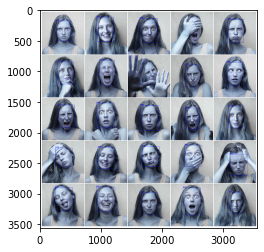

In [45]:
plt.imshow(image)
cv.imwrite('detection_results/latest_image_dnn.jpg', image)